In [1]:
# Packages and initialisations
import os,sys # to access the system
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# CAMB (Code for Anisotropies in the Microwave Background)

See also: https://camb.readthedocs.io/en/latest/#

### Step 1: Installing CAMB (on MAC)

1) __Xcode__: downaload Xcode and install command line tool from shell: `xcode-select --install`

2) __gfortran__: downaload bin: https://github.com/fxcoudert/gfortran-for-macOS/releases and follows installation's instruction

3) __CAMB__: from shell type `git clone --recursive https://github.com/cmbant/CAMB.git ` and `pip3 install -e ./CAMB`

### Step 2: Importing CAMB

In [2]:
camb_installation_path = '/Users/williamgiare/cosmo/CAMB/'
camb_path = os.path.realpath(os.path.join(os.getcwd(),camb_installation_path))
sys.path.insert(0,camb_path)

import camb
from camb import *

### Step 3: Fixing the cosmological parameters

You can fix the values of cosmological parameters as follows:

In [3]:
cosmic_params = model.CAMBparams()
    
cosmic_params = camb.set_params(
    
    #---- Standard 6 params (fixed to Planck measured values)-----:
    
    H0=67.4, #Hubble constant
    ombh2=0.022, #baryon energy density
    omch2=0.12, #cold dark matter energy density
    tau=0.054,  #optical depth at reionization
    ns=0.965,  #spectral index of primordial pertrbations
    As=2.1e-9, # Amplitude of primordial pertrbations
    
    #---- Other key Params (fixed to the standard value)-----
    
    w=-1, # Dark Energy EOS -> w=-1 means P=-ρ
    wa=0, # Dynamical Dark Energy: wDE = w + wa(1 − a) 
    nrun=0, # running of the sectral index dns/dlogk
    nrunrun=0, # running of running of the sectral index dnrun/dlogk
    omk=0, # curvature density parameter (<0 closed, =0 flat, >0 open)
    mnu=0.06, # total neutrino mass (sum over neutrino species)
    nnu=3.044, # effective number of relativistic particles in the early Universe (SM is nnu=3.44)
    Alens=1, # lensing Amplitude (=1 GR, >1 more lensing than GR)
    
    #---- Other precision Params -----
    
    halofit_version='mead', #code for
    lmax=2500, #maximum multipole you are interested in 
    lens_potential_accuracy=1, #accurancy in the lensing potential 
    WantTensors = False, #Do you want to include the tensor contribution in the Cl
    
    # ... many other, see CAMB/inifiles/parmams.ini for a detailed list!
)

This will create a dictionary (here called 'cosmic_params') that contains all the information on cosmological parameters and their values. You can always access the dictionary and its elements as follows:

In [5]:
print('--------------------------------------------------------------')
print('Here is a list of cosmic parameters:')
print('1) Expansion Rate, H0=', cosmic_params.H0,'Km/s/Mpc')
print('2) Baryon Energy Density, Ω_b h^2= ',cosmic_params.ombh2)
print('3) Cold Dark Matter Energy Density, Ω_c h^2=',cosmic_params.omch2)
print('4) Optical Depth at Reionization, τ=',cosmic_params.Reion.optical_depth)
print('5) Amplitude of Primordial Perturbations, As=',cosmic_params.InitPower.As)
print('6) Spectral Index of Primordial Perturbations, ns= ',cosmic_params.InitPower.ns)
print('--------------------------------------------------------------')

--------------------------------------------------------------
Here is a list of cosmic parameters:
1) Expansion Rate, H0= 67.4 Km/s/Mpc
2) Baryon Energy Density, Ω_b h^2=  0.022
3) Cold Dark Matter Energy Density, Ω_c h^2= 0.12
4) Optical Depth at Reionization, τ= 0.054
5) Amplitude of Primordial Perturbations, As= 2.1e-09
6) Spectral Index of Primordial Perturbations, ns=  0.965
--------------------------------------------------------------


#### Note:
You can always change the value of any params

In [6]:
# I copy everything in new_cosmic_params
new_cosmic_params=cosmic_params
#new_cosmic_params has the same parameter than cosmic_params

# I now change something..
new_cosmic_params.WantTensors=True
new_cosmic_params.InitPower.r=0.1
new_cosmic_params.InitPower.nt = (-1/8)*cosmic_params.InitPower.r #assuming here the nt=-r/8

In [7]:
print('WantTensors is now', new_cosmic_params.WantTensors)
print('r=',new_cosmic_params.InitPower.r)
print('nt=',new_cosmic_params.InitPower.nt)

WantTensors is now True
r= 0.1
nt= -0.0125


### Step 4: Computing the Cosmology

In [7]:
cosmology = camb.get_results(cosmic_params)

"cosmology" is a dictionary that contains information on any (input and primary) quantity of your cosmology.

In [8]:
#Are you brave enough to go through it?
cosmology

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = True
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_lens
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 5.0
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2650
   max_l_tensor = 600
   max_eta_k = 18000.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.022
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24569492503497048
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   In

You can also have information of any derived parameters (age of the Universe, sound horizon etc) simply as follows:

In [9]:
cosmology.get_derived_params()

{'age': 13.80333876493313,
 'zstar': 1090.4109216959414,
 'rstar': 144.72278756652995,
 'thetastar': 1.0422490114383751,
 'DAstar': 13.885624834203735,
 'zdrag': 1059.0867183226367,
 'rdrag': 147.5144726630889,
 'kd': 0.14011873195345398,
 'thetad': 0.16146866221804534,
 'zeq': 3394.0341233953463,
 'keq': 0.010357913922705917,
 'thetaeq': 0.8145901164338183,
 'thetarseq': 0.45037734738183177}

you can also get params one by one, e.g., 

`rdrag=cosmology.get_derived_params()['rdrag']`

### Step 5: Computing the CMB angular power spectra

In [10]:
power_spectra = cosmology.get_cmb_power_spectra(CMB_unit='muK')

`power-spectra` contains $D_{\ell}\equiv \frac{\ell(\ell+1)}{2\pi} C_{\ell}$ 

In [11]:
for name in power_spectra: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


Where:

- `total` represents the total (lensed) $D_{\ell}^{\rm tot}=C_{\ell}^{\rm scalar}+C_{\ell}^{\rm tensor}$.
- `unlensed_scalar` refers to the unlensed $D_{\ell}^{\rm scalar}$.
- `unlensed_total` refers to the unlensed $D_{\ell}^{\rm tot}$.
- `lens_potential` refers to the lensing potential


Important Notes:

- the arrays are all zero based (starting at $\ell=0$), Note $\ell=0,1$ entries will be zero by default.

- The different $D_{\ell}$ are always in the order TT, EE, BB, TE (with BB=0 for `unlensed_scalar`).

If we are interested in the `total` $D_{\ell}$ (and say `unlensed_scalar`BB spectrum), we can access the different spectra as follows

In [12]:
TT=power_spectra['total'][2:,0] #total (lensed) DL for TT
EE=power_spectra['total'][2:,1] #total (lensed) DL for EE
BB=power_spectra['total'][2:,2] #total (lensed) DL for BB
TE=power_spectra['total'][2:,3] #total (lensed) DL for TE

unlensed_BB=power_spectra['unlensed_scalar'][2:,2] #unlensed DL for BB only from scalar (expected to be 0)

ell=np.arange(TT.shape[0]) # multipoles ell

Let's plot them!

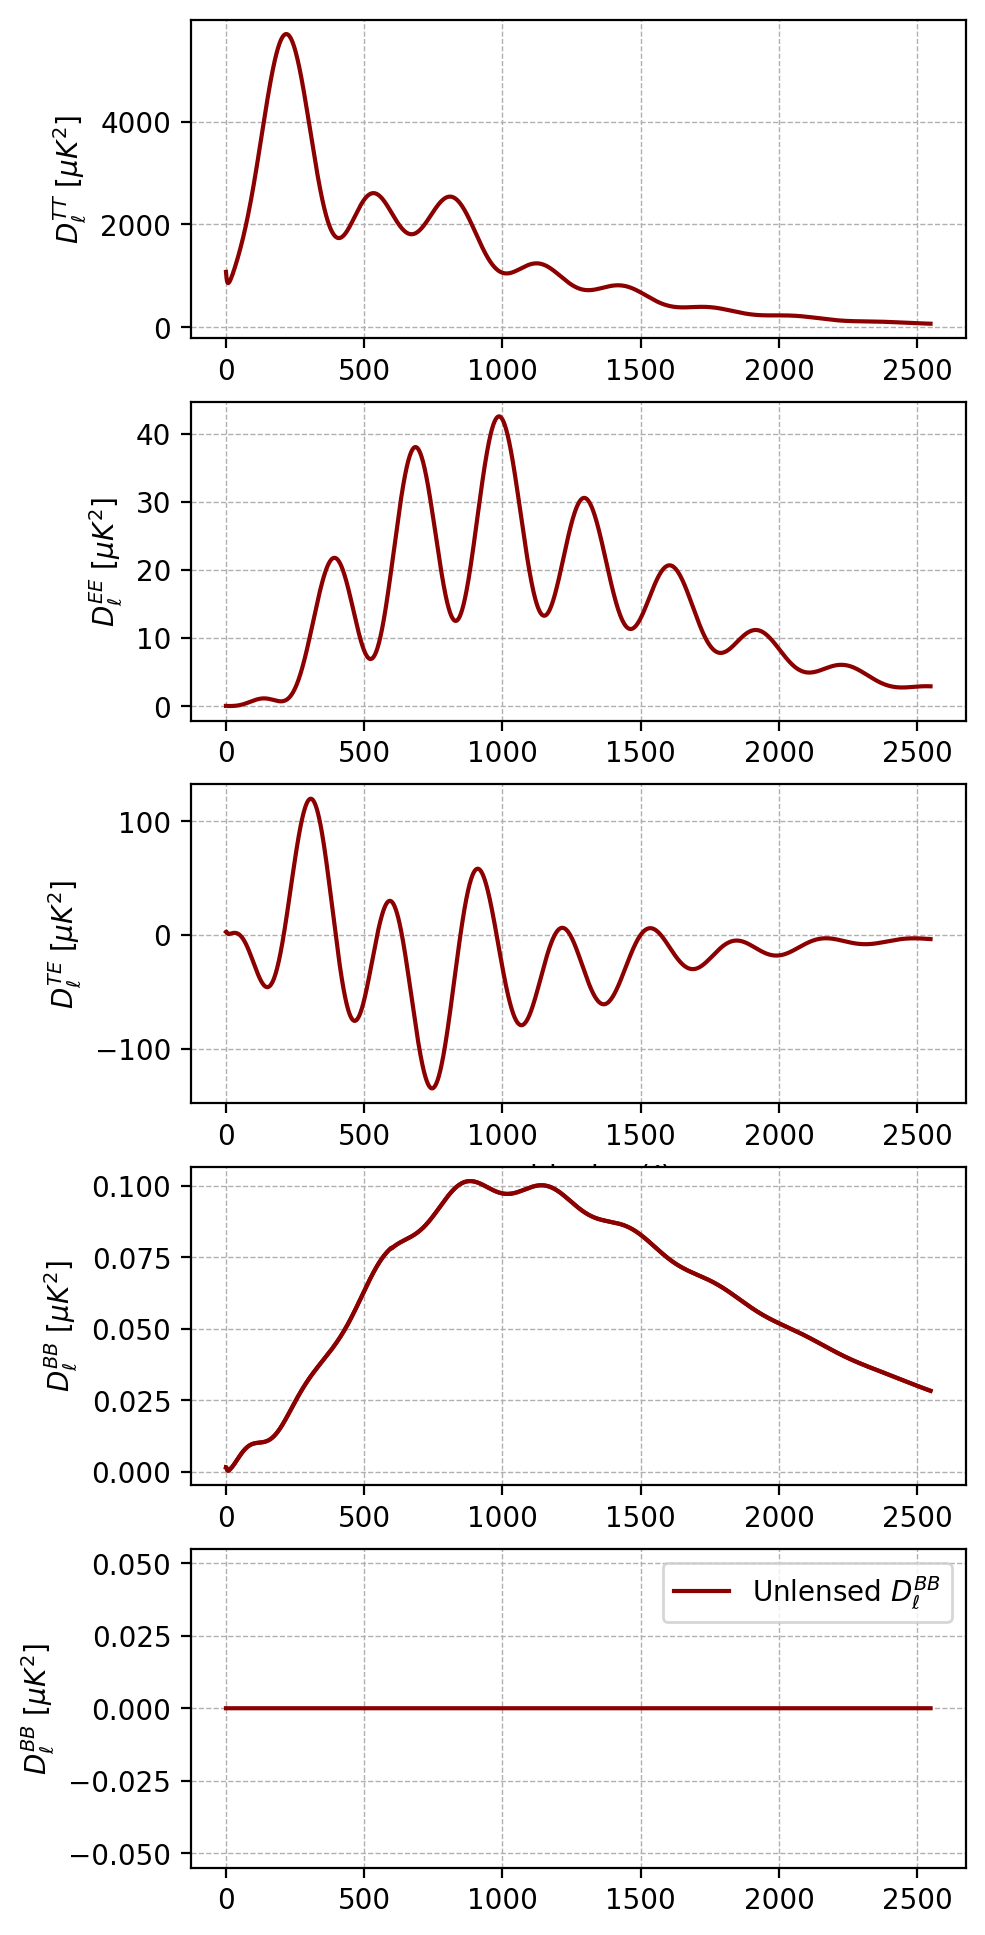

In [13]:
fig, ax = plt.subplots(5,1, figsize = (5,12), gridspec_kw={'height_ratios': [1,1,1,1,1]})

ax[0].set_ylabel(r'$D_{\ell}^{TT}$ [$\mu K^2$]')
ax[0].plot(ell,TT, color='Darkred')
ax[0].grid(lw=0.5, ls='--')

ax[1].set_ylabel(r'$D_{\ell}^{EE}$ [$\mu K^2$]')
ax[1].plot(ell,EE, color='Darkred')
ax[1].grid(lw=0.5, ls='--')

ax[2].set_ylabel(r'$D_{\ell}^{TE}$ [$\mu K^2$]')
ax[2].set_xlabel(r'multipoles ($\ell$)')
ax[2].plot(ell,TE, color='Darkred')
ax[2].grid(lw=0.5, ls='--')

ax[3].set_ylabel(r'$D_{\ell}^{BB}$ [$\mu K^2$]')
ax[3].plot(ell,BB, color='Darkred')
ax[3].grid(lw=0.5, ls='--')

ax[3].set_ylabel(r'$D_{\ell}^{BB}$ [$\mu K^2$]')
ax[3].plot(ell,BB, color='Darkred')
ax[3].grid(lw=0.5, ls='--')

ax[4].set_ylabel(r'$D_{\ell}^{BB}$ [$\mu K^2$]')
ax[4].plot(ell,unlensed_BB, color='Darkred', label=r"Unlensed $D_{\ell}^{BB}$")
ax[4].grid(lw=0.5, ls='--')

ax[4].legend()

plt.show()

### Step 6: Getting the primordial power spectra

To get the primordial power spectrum at different k you just need to input `cosmic_params`

In [14]:
k=10**np.linspace(-5, 1, 50)
Ps= cosmic_params.scalar_power(k)

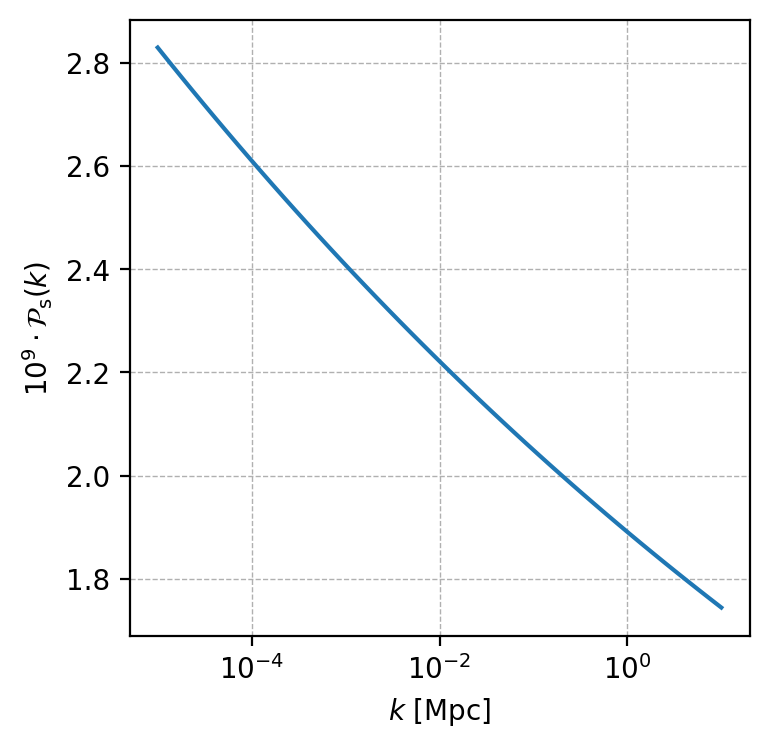

In [15]:
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.semilogx(k,1e9*Ps);
ax.set_xlabel(r'$k$ [Mpc]')
ax.set_ylabel(r'$10^{9}\cdot\mathcal{P}_{\rm s}(k)$')
ax.grid(lw=0.5, ls='--')

If in your cosmic_params you have tensors, than you do the same with `cosmic_params.tensor_power(k)`

### Step 7: Getting the CMB transfer functions

In [16]:
transfer = camb.get_transfer_functions(cosmic_params).get_cmb_transfer_data('scalar')

transfer contains the transfer functions $T^{\rm type}_{\ell}(k)$. 

It has the following strcutre

- `transfer.q` gives the wevenumber k at which  $T^{\rm type}_{\ell}(k)$ is evaluated

- `transfer.delta_p_l_k[type_index,multipole_index,:]` gives $T^{\rm type}_{\ell}(k)$
  - `type_index` should be
    - 0 for Temperature, $T^{T}_{\ell}(k)$ 
    - 1 for E-modes polarization, $T^{E}_{\ell}(k)$ 
    - 2 for B-modes (here lensing), $T^{B}_{\ell}(k)$
  - `multipole_index` is some $\ell$ at which the transfer function is calculated.

The multipoles at whcih the transfer functions are calculated cab be accessed by `transfer.L`

In [17]:
#transfer.L
#multipole_index=0
#transfer.L[multipole_index]

For instance, if we are interested in $T^{T}_{\ell=2}(k)$

- since we are interested in T, then `type_index=0`
- $\ell=2$ corresponds to `multipole_index=0`. 

Let's plot $T^{T}_{\ell=2}(k)$ ...

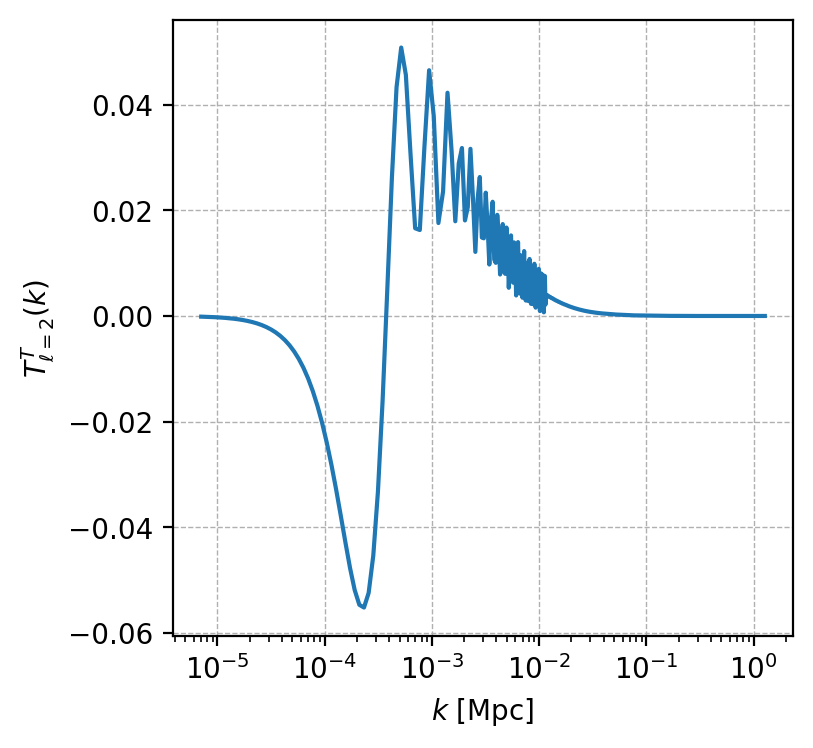

In [18]:
type_index=0 # for selecting T
multipole_index=0 # for selecting ell=2

fig, ax = plt.subplots(1,1, figsize = (4,4))
plt.semilogx(transfer.q, transfer.delta_p_l_k[type_index,multipole_index,:])
plt.xlabel(r'$k$ [Mpc]')
plt.ylabel(r'$T^{T}_{\ell=2}(k)$')
plt.grid(lw=0.5, ls='--')

... and $T^{E}_{\ell=5}(k)$

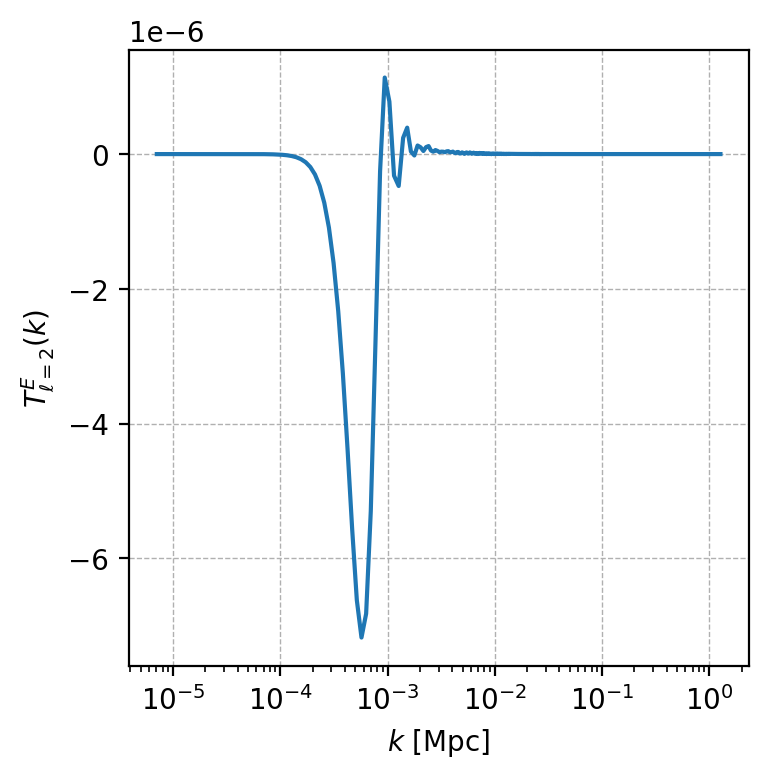

In [19]:
type_index=1 # for selecting %
multipole_index=3 # for selecting ell=5

fig, ax = plt.subplots(1,1, figsize = (4,4))
plt.semilogx(transfer.q, transfer.delta_p_l_k[type_index,multipole_index,:])
plt.xlabel(r'$k$ [Mpc]')
plt.ylabel(r'$T^{E}_{\ell=2}(k)$')
plt.grid(lw=0.5, ls='--')

### Step 8: Non-standard primordial spectra

Suppose you have a wierd model of inflation whose spectrum is given by 

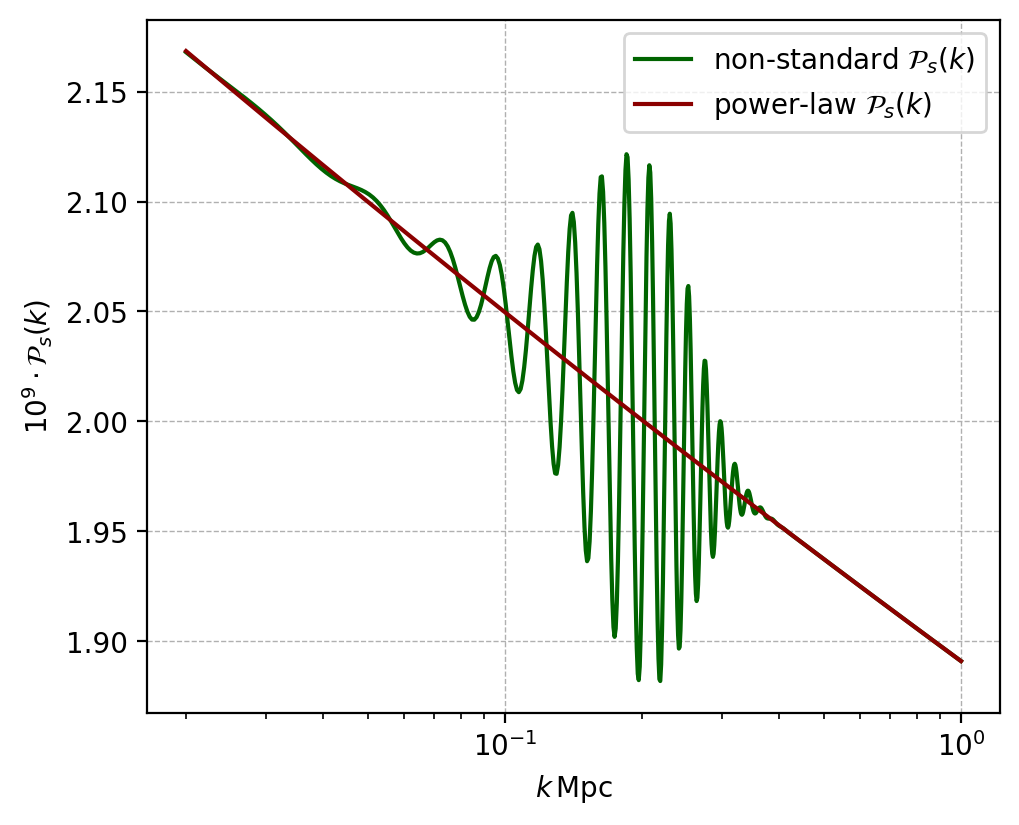

In [20]:
def PK(k, As, ns, amp, freq, wid, centre, phase):
    return As*(k/0.05)**(ns-1)*(1+ np.sin(phase+k*freq)*amp*np.exp(-(k-centre)**2/wid**2))

k_s = np.linspace(0.02,1,1000)
Ps_1 = 1e9*cosmic_params.InitPower.As*(k_s/0.05)**(cosmic_params.InitPower.ns-1)
Ps_2 = 1e9*PK(k_s,cosmic_params.InitPower.As,cosmic_params.InitPower.ns,0.0599, 280, 0.08, 0.2,0)
fig = plt.subplots(1,1, figsize = (5.5,4.5))

plt.semilogx(k_s,Ps_2,color='Darkgreen',ls='-',label='non-standard $\mathcal{P}_s(k)$')
plt.semilogx(k_s,Ps_1,color='Darkred',ls='-',label='power-law $\mathcal{P}_s(k)$')

plt.ylabel('$10^{9}\cdot \mathcal{P}_s(k)$')
plt.xlabel(r'$k\, {\rm Mpc}$')
plt.legend()
plt.grid(lw=0.5, ls='--')

Let's compute $C_{\ell}^{TT}$ for this model of inflation

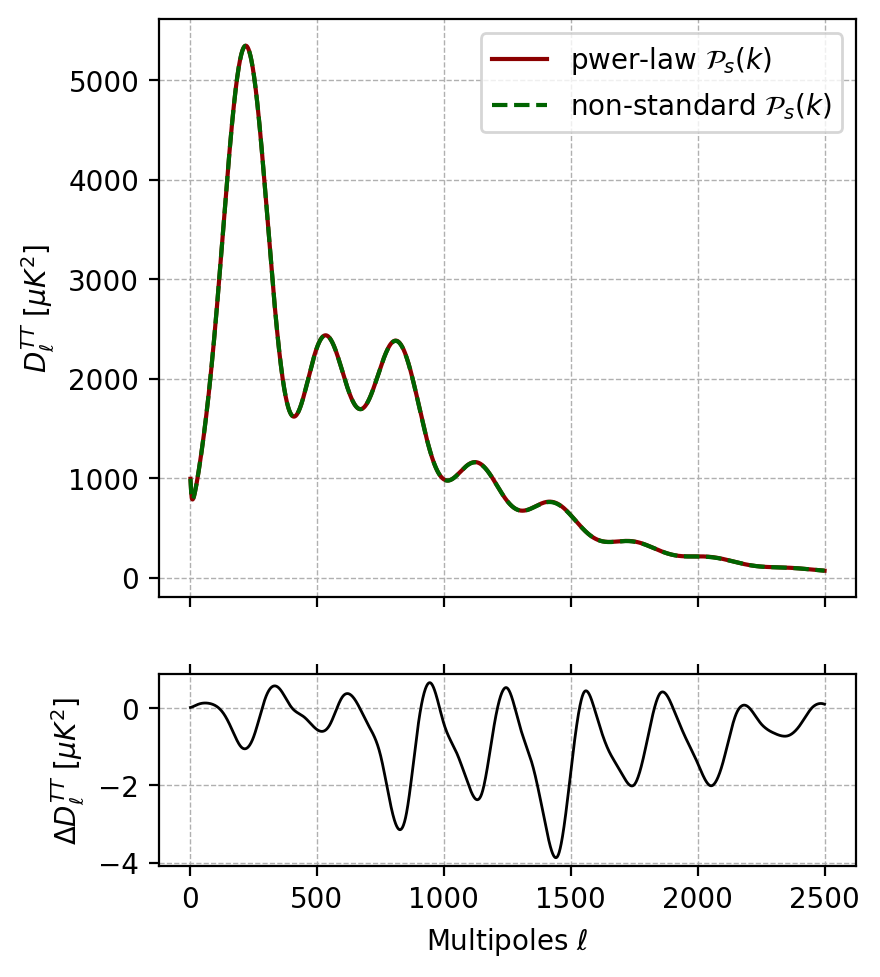

In [21]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, tau=0.06)
lmax=2500
pars.set_for_lmax(lmax,lens_potential_accuracy=1)

#Standard power spectrum
pars.InitPower.set_params(As=2e-9, ns=0.96)
results = camb.get_results(pars)
cl_unlensed=results.get_unlensed_scalar_cls(CMB_unit ='muK')
cl=results.get_lensed_scalar_cls(CMB_unit ='muK')

#my power spectrum
As = 2e-9
ns = 0.96
amp = 0.06
freq = 280
wid = 0.08
centre = 0.2
phase = 0

pars.set_initial_power_function(PK, 
                                args=(As,ns,amp,freq,wid,centre,phase), 
                                effective_ns_for_nonlinear=ns
                               )

results2 = camb.get_results(pars)
cl2=results2.get_lensed_scalar_cls(CMB_unit ='muK')
ls = np.arange(2,lmax)

fig, ax = plt.subplots(2,1, figsize = (4.5,5.5),gridspec_kw={'height_ratios': [1.5, 0.5]})
ax[0].plot(ls,cl[2:lmax,0], color='Darkred',ls='-',label=r'pwer-law $\mathcal{P}_s(k)$')
ax[0].plot(ls,cl2[2:lmax,0], color='Darkgreen',ls='--',label=r'non-standard $\mathcal{P}_s(k)$')
ax[0].set_ylabel(r'$D_{\ell}^{TT}$ [$\mu K^2$]')
ax[0].set_xticklabels([])
ax[0].grid(lw=0.5, ls='--')
ax[0].legend()

ax[1].plot(ls,(cl2[2:lmax,0]-cl[2:lmax,0]),c='k',lw=1)
ax[1].set_ylabel(r'$\Delta D_{\ell}^{TT}$ [$\mu K^2$]')
ax[1].grid(lw=0.5, ls='--')
ax[1].set_xlabel(r'Multipoles $\ell$')
ax[1].xaxis.set_tick_params(top=True)
plt.show()